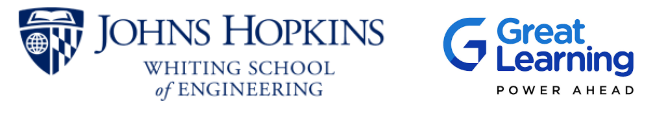

<font size=10>**Prompt Engineering**</font>

<font size=6>**AI-Assisted Differential Diagnosis**</font>

# **Business Problem - Enhancing Triage with Prompt Engineering**



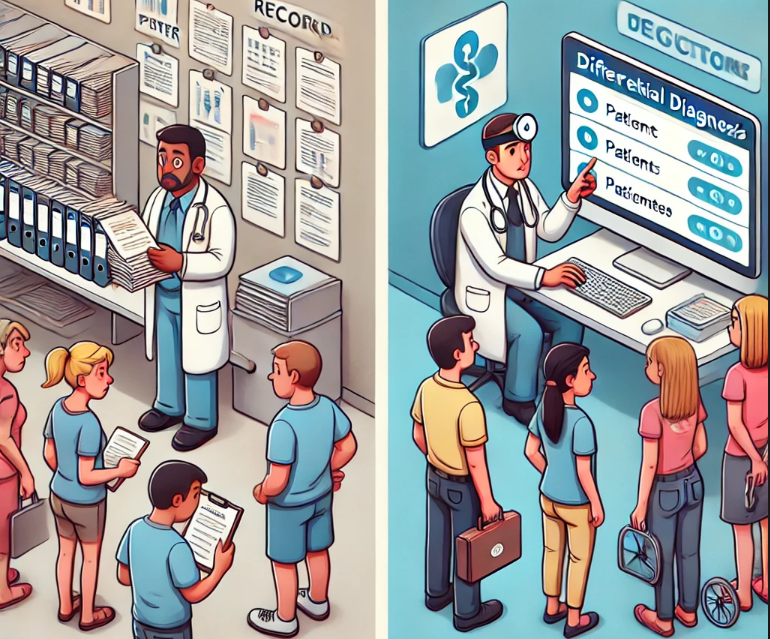

In the healthcare domain, timely and accurate diagnosis of medical conditions is crucial for effective treatment and improved patient outcomes. However, the differential diagnosis process is often complex and time-consuming, especially when multiple symptoms overlap across different medical conditions.

Medical practitioners face the challenge of manually analyzing patient symptoms, which can lead to delays, inefficiencies, and potential misdiagnoses. Traditional methods of diagnosis rely heavily on the experience of the practitioner, making the process prone to variability and subjectivity.

To address these challenges, the healthcare sector is increasingly exploring AI-based solutions to improve diagnostic processes. Leveraging Generative AI models can significantly enhance the accuracy, speed, and consistency of differential diagnosis by understanding the relationship between patient symptoms and possible medical conditions.

The objective of this case study is to build an AI-powered differential diagnosis system that serves as a decision support tool for healthcare professionals, ultimately improving diagnostic accuracy and patient care.

## **Key Business Outcomes**
✅ **Improved Diagnostic Accuracy:** Generate differential diagnosis suggestions with higher accuracy based on symptom patterns.

✅ **Faster Decision-Making:** Reduce the time taken to analyze symptoms and suggest probable conditions.

✅ **Enhanced Patient Care:** Enable healthcare professionals to provide faster and more effective treatment.

✅ **Consistency in Diagnosis:** Standardize the diagnostic process, reducing variability in medical decisions.

✅ **Demonstrate Prompting Techniques:** Illustrate different prompting methods like Few-Shot, Chain of Thought (CoT), and Tree of Thought to teach AI-based decision-making.

## **Objective**
The primary objective is to develop an **AI-powered differential diagnosis system** that:

🔹 Understands the **relationship** between patient symptoms and possible medical conditions.

🔹 Utilizes **LLaMA** models for generating **diagnosis suggestions**.

🔹 Applies **Few-Shot Prompting**, **Chain of Thought (CoT)**, and **Tree of Thought (ToT)** techniques for symptom-based predictions.

🔹  Delivers **consistent and reliable** differential diagnosis outcomes.


## <font color='blue'>**Solution Approach**</font>

<font color='blue'>**1. Environment Setup & Installation**</font>
* Install necessary libraries and **verify GPU** availability using `nvidia-smi`.
* Set up Colab notebook environment for running the **differential diagnosis** pipeline.

<font color='blue'>**2. Model Loading & Configuration**</font>
* Install `llama-cpp-python` with GPU support.
* Load **Meta-Llama-3-8B-Instruct-GGUF** model using `llama-cpp-python` for inference.
* Configure model parameters such as **temperature**, **max tokens**, and **top-k sampling** for generating responses.

<font color='blue'>**3. Prompt Engineering**</font>
* **Few-Shot Prompting:** Include 2-3 examples of symptom-diagnosis pairs to guide the model.
* **Chain of Thought (CoT):** Formulate prompts that instruct the model to explain its reasoning step-by-step before arriving at a diagnosis.
* **Tree of Thought (ToT):** Design prompts that guide the model through branching decision points based on individual diagnosis.

<font color='blue'>**4. Inference & Output Generation**</font>
* Generate **differential diagnosis suggestions** based on patient symptoms.
* Format outputs with **numbered diagnostic possibilities** and reasoning.
* **Compare model** responses across Few-Shot, CoT, and ToT techniques

## <font color='blue'>**Solution Workflow**</font>

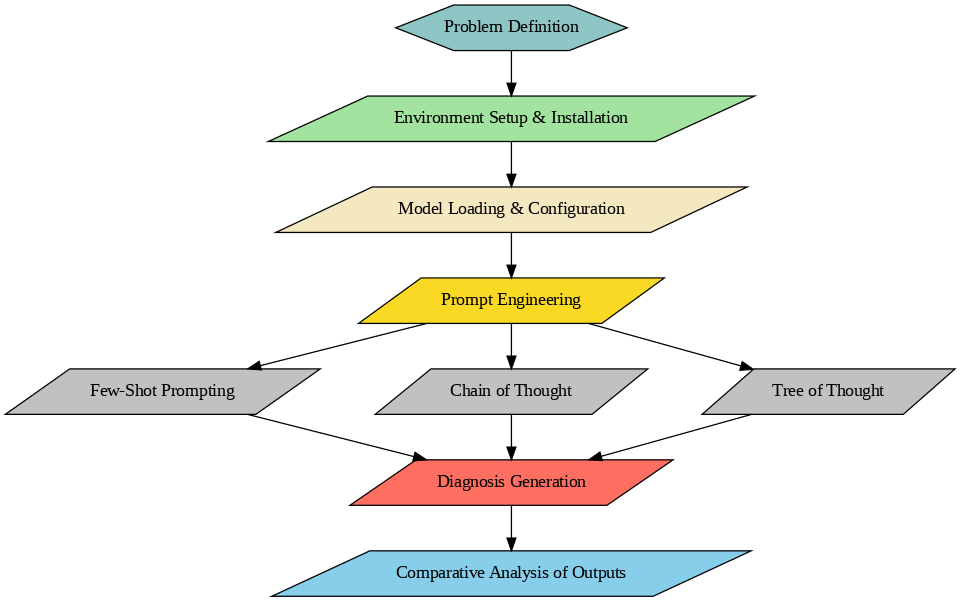

# **<font color='blue'>Environment Setup & Installation</font>**

This section involves setting up the environment and installing the necessary libraries required for running the AI model.

This command checks if the Colab notebook or local environment has access to an NVIDIA GPU. The NVIDIA System Management Interface (`nvidia-smi`) displays details about the available GPUs such as memory, usage, and driver versions. A GPU helps in faster inference for models like LLaMA.

In [ ]:
# GPU availability check
!nvidia-smi


- This command installs the `llama-cpp-python` library, which provides bindings to run LLaMA models on both CPU and GPU.
- The parameter `-DLLAMA_CUBLAS=on` enables CUDA BLAS support, which allows the model to perform matrix operations on the GPU.

In [ ]:
# Installation for GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.28 --force-reinstall --upgrade --no-cache-dir --verbose -q 2>/dev/null

We will be installing the following Libraries

In [ ]:
# Install required libraries

!pip install -q numpy scipy huggingface_hub==0.29.1 datasets evaluate==0.4.3 2>/dev/null matplotlib seaborn==0.12.2 pandas

- **numpy, scipy:** For numerical computations.

- **huggingface_hub:** To interact with the Hugging Face model hub.

- **datasets:** For loading benchmark datasets.

- **evaluate:** For performance evaluation.

- **matplotlib, seaborn:** For data visualization.



In [ ]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import seaborn as sn

Loading the Dataset. The `df.head()` function displays the first five rows of the dataset to give a quick preview of its structure.

In [ ]:
dataset_path = "/content/differential_diagnosis_dataset.csv"
df = pd.read_csv(dataset_path)

In [ ]:
# Display dataset sample
df.head()

In [ ]:
# Visualizing Symptom Distribution
plt.figure(figsize=(12, 6))
sn.countplot(data=df, x='Symptom', order=df['Symptom'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Primary Symptoms')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')
plt.show()

# **<font color='blue'>Model Loading and Configuration</font>**



This section demonstrates how to load the **Meta-Llama-3-8B-Instruct** model using the `llama-cpp-python` library.

In [ ]:
from huggingface_hub import hf_hub_download
from llama_cpp import Llama

**Model Download:** The model is downloaded from Hugging Face's model hub using the `hf_hub_download()` method.

- The `model_name_or_path` specifies the model repository.

- The `filename` parameter defines which quantized model version to download.

- **Meta-Llama-3-8B-Instruct** → Meta's **LLaMA-3 model** (8 Billion parameters version).
- **Instruct** → It is an **instruction-tuned mode**l optimized for conversational or prompt-based tasks like Q&A or diagnosis.
- **Q8_0** → This denotes **Quantization Level (Q8)**

  Quantization is a compression technique to reduce model size and improve inference speed. Quantization reduces the size of the model by representing weights with fewer bits (e.g., 4-bit, 8-bit) instead of the original 16-bit or 32-bit floating-point numbers.

  *Q8_0 means 8-bit quantization, which provides better model accuracy compared to lower quantization levels like Q4_0 or Q5_0, but requires more memory and computational resources.*

In [ ]:
model_name_or_path = "QuantFactory/Meta-Llama-3-8B-Instruct-GGUF"
model_basename = "Meta-Llama-3-8B-Instruct.Q8_0.gguf"

# Download model from Hugging Face
model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
)

🔥 What Will Changing the Model Affect?

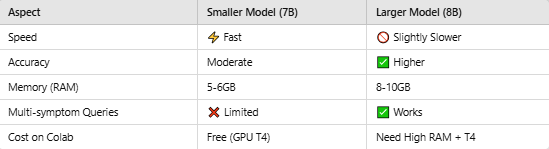

**Model Initialization:**

The `Llama()` class is used to initialize the model with the following parameters:

- `model_path`: Path to the downloaded model.

- `n_threads`: Number of CPU threads to use.

- `n_batch`: The batch size for processing tokens.

- `n_gpu_layers`: Number of layers to offload to the GPU for faster inference.

- `n_ctx`: The context window size, which defines how many tokens the model can consider at once.

In [ ]:
llm = Llama(
    model_path=model_path,
    n_threads= 4, # CPU cores
    n_batch=256, # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    n_gpu_layers=43, # Change this value based on your model and your GPU VRAM pool.
    n_ctx=8192 # Context window
)

**Model Inference Function:**

The `lcpp_llm()` function acts as an interface to generate model responses.

Parameters:

- `prompt:` The input text for the model.

- `max_tokens:` Maximum number of tokens to generate.

- `temperature:` Controls randomness (lower values yield more deterministic outputs).

- `stop:` List of stop words that halt generation when encountered.

In [ ]:
# Function to generate model responses
def lcpp_llm(prompt, max_tokens=256, temperature=0, stop=["USER"]):
    return llm(prompt, max_tokens=max_tokens, temperature=temperature, stop=stop)

This setup ensures that the model is correctly loaded and ready to generate predictions.

# **<font color='blue'>Prompt Engineering</font>**

In this section, we explore different prompting techniques to generate medical diagnoses from the LLaMA model.

**Prompt Engineering** is a critical technique in LLM-based applications to guide the model in generating structured and accurate responses. This section demonstrates three prompting methods: **Few Shot, Chain of Thought (CoT), and Tree of Thought (ToT)**, applied to the differential diagnosis use case.

**Extracting Diagnoses using Regex**

We define a helper function `extract_list()`** that uses regular expressions to extract list-based diagnoses from the model's response.

***It will be used after this section for inference.*

In [ ]:
# Function to extract diagnosis lists using regex
import json
import re

def extract_list(text):
    match = re.search(r'\[(.*?)\]', text)
    if match:
        items = match.group(1).split(",")
        return [item.strip() for item in items]
    return []

Give a common `user_query` which can be changed and edited in this format for multiple use case.

*Format:* `"A {age}-year-old {gender}, {symptom/symptoms}."`

In [ ]:
user_query = "A 35-year-old male, fever, wheezing, nausea."

## **Few Shot Prompting**

Few-shot prompting provides the model with multiple example queries and their expected diagnoses. This helps the model understand the pattern before answering a new query.

- The system prompt provides 3 examples of input symptoms and corresponding diagnoses.

- The user query is appended to the system prompt.

- The model generates a list of diagnoses based on the examples.

In [ ]:
# **1. Few Shot Prompting**
system_prompt_few_shot = """
SYSTEM:
You are an AI medical assistant specializing in differential diagnosis.
Generate the most likely list of diagnoses based on examples.

USER: A 45-year-old male, fever, cough, fatigue.
SYSTEM: [Flu, COVID-19, Pneumonia]

USER: A 30-year-old female, severe abdominal pain, nausea.
SYSTEM: [Appendicitis, Gallstones, Gastritis]

USER: A 10-year-old female, wheezing.
SYSTEM: [Asthma, Respiratory Infection]

USER:
"""

In [ ]:
few_shot_prompt = system_prompt_few_shot + user_query

In [ ]:
response = lcpp_llm(few_shot_prompt)
output_few_shot = response['choices'][0]['text'].strip()
print("--- Few Shot Prompting Response ---\n", output_few_shot)

## **Chain of Thought (CoT) Prompting**

Chain of Thought prompting encourages the model to explain its reasoning step-by-step before providing the final diagnosis.

- The model is instructed to break down its reasoning process into three steps:

  1. Analyzing symptoms.

  2. Listing possible conditions.

  3. Providing the final diagnosis.

- This method helps improve model accuracy by guiding its thought process.

In [ ]:
# **2. Chain of Thought (CoT) Prompting**
system_prompt_cot = """
    SYSTEM:
    You are a medical expert performing differential diagnosis through step-by-step reasoning.
    1. Analyze the symptoms and list underlying possible conditions.
    2. Explain each possibility step-by-step.
    3. Provide the final list of probable diagnoses.

    Provide the final output in the format provided below.
    OUTPUT:
      Explanation of reasoning:
      "
      - Fatigue is a common symptom in many conditions.
      - For a 50-year-old male, fatigue can indicate cardiovascular or metabolic issues.
      - Common diagnoses for fatigue:
        - Anemia
        - Diabetes
        - Thyroid disorder
        - Heart disease "

      Most probable diagnosis: [Diagnosis 1, Diagnosis 2, Diagnosis 3]

      USER:
    """

In [ ]:
cot_prompt = system_prompt_cot + user_query

In [ ]:
response = lcpp_llm(cot_prompt, max_tokens= 512)
output_cot = response['choices'][0]['text'].strip()
print("--- Chain of Thought Response ---\n", output_cot)

## **Tree of Thought (ToT) Prompting**

Tree of Thought prompting simulates a discussion between multiple expert agents, each presenting their reasoning and verifying others' suggestions.

**Step 1: Expert Hypothesis Generation (Multiple Thought Branches)**

*What happens:*

- The model simulates three independent experts, each analyzing the same patient symptoms.

- They are asked to generate three distinct hypotheses (i.e., different diagnostic paths or interpretations) based on the same user query.

- This branching ensures multiple reasoning paths rather than relying on a single chain of thought, which increases diagnostic coverage.

In [ ]:
# Step 1: Prompt each expert for 3 diagnoses
def expert_prompt(name, specialty, query):
    return f"""
    SYSTEM:
      You are {name}, a medical expert specializing in {specialty}.
      Analyze the patient's symptoms using clinical reasoning.
      Generate three distinct hypotheses and reasoning for the symptoms below.


      Your task:
      - Generate exactly three diagnoses based on the symptoms.
      - For each, provide a short justification in parentheses.
      - Number the diagnoses clearly using "- Diagnosis 1:", "- Diagnosis 2:", "- Diagnosis 3:".
      - Do **not** include any extra explanation or summary outside the required format.
      - Strictly follow the format. **Return only the diagnoses as shown below. No headers, no context.**
      Patient symptoms: {query}

      Provide the final output in the format provided below.
      Output Format:
      - Diagnosis 1: ... (reason)
      - Diagnosis 2: ... (reason)
      - Diagnosis 3: ... (reason)

    USER:
"""

In [ ]:
expert_A = lcpp_llm(expert_prompt("Expert A", "Internal Medicine", user_query), max_tokens= 400)
expert_B = lcpp_llm(expert_prompt("Expert B", "Pulmonology", user_query), max_tokens= 400)
expert_C = lcpp_llm(expert_prompt("Expert C", "Infectious Diseases", user_query), max_tokens= 400)

# lcpp_llm returns a dict, so update it to:
expert_A = expert_A['choices'][0]['text'].strip()
expert_B = expert_B['choices'][0]['text'].strip()
expert_C = expert_C['choices'][0]['text'].strip()

print("--- Expert A ---\n", expert_A)
print("--- Expert B ---\n", expert_B)
print("--- Expert C ---\n", expert_C)

**Step 2: Hypothesis Evaluation (Scoring/Ranking Paths)**

*What happens:*

- The model acts as a senior doctor reviewing the diagnoses from the above experts.

- It then evaluates each hypothesis:

  - Assigns a numerical score (1–5),

  - Provides justification for each score.

- Scoring allows to filter out weaker hypotheses and prioritize the most clinically relevant ones.



In [ ]:
# Step 2: Evaluation and Critique
combined_experts = f"""
      Expert A:
      {expert_A}

      Expert B:
      {expert_B}

      Expert C:
      {expert_C}
"""

In [ ]:
evaluation_prompt = f"""
    SYSTEM:
      You are a senior doctor reviewing the differential diagnoses from 3 medical experts.
      Each expert has provided 3 diagnoses based on the same patient case.

      Your task is to:
      1. Evaluate the quality and clinical reasoning of each diagnosis.
      2. Score each diagnosis on a scale of 1–5 (5 = highly likely and well-reasoned).
      3. Justify each score briefly.

      Expert Diagnoses:
      {combined_experts}

      Format your output strictly as:
      - Expert A Diagnosis 1: [score], name, reason: ...
      - Expert A Diagnosis 2: [score], name, reason: ...
      ...
      - Expert C Diagnosis 3: [score], name, reason: ...

    USER:
"""

In [ ]:
evaluation = lcpp_llm(evaluation_prompt + combined_experts, max_tokens=768)
evaluation = evaluation['choices'][0]['text'].strip()
print("\n--- Evaluation and Critique ---\n", evaluation)

**Step 3: Final Consensus (Best Paths)**

*What happens:*

- The model (acting as an “expert summarizer”) reviews all hypotheses and their scores, identifies overlaps, and determines which diagnoses are consistently strong across experts.

- From all branches, the top three most probable diagnoses are selected and returned as a final list

This is where multiple independent reasoning paths converge into a single decision.

In [ ]:
# Step 3: Final Consensus Diagnosis  (without a separate user and system prompt)
consensus_prompt = f"""
      You are an expert summarizer reviewing the following medical expert opinions and evaluation scores.

      Your task is to:
      1. Review all diagnoses from the experts.
      2. Select the 3 most probable diagnoses overall, based on the scores and clinical reasoning.
      3. Provide the final list of possible diagnoses (within square brackets).

      Expert Diagnoses:
      {combined_experts}

      Evaluation Scores:
      {evaluation}

      OUTPUT:
       Most probable diagnoses: [Diagnosis 1, Diagnosis 2, Diagnosis 3]
"""

In [ ]:
final_consensus = lcpp_llm(consensus_prompt, max_tokens=150)
output_tot = final_consensus['choices'][0]['text'].strip()
print("\n--- Tree of Thought Response ---\n", output_tot)

# **<font color='blue'>Inference and Output Generation</font>**

In this section, we will generate and organize the model's output for each prompting technique into a structured table format. This helps in comparing the diagnoses generated by **Few Shot, Chain of Thought (CoT), and Tree of Thought (ToT)** prompting methods.

1. **Extract Diagnoses Using Regex:**

  - The `extract_list()` function uses regular expressions to extract the list of diagnoses enclosed in square brackets (`[]`) from the model's response text.

  - This ensures that the diagnoses are captured in a structured format for further analysis.

2. **Creating the Diagnoses Table:**

  * The first DataFrame stores the prompting techniques and their corresponding list of diagnoses.

  * This helps visualize how different prompting strategies yield different outcomes.


In [ ]:
# Extract Diagnoses and Create Table**
data = {
    "Prompting Technique": ["Few Shot", "Chain of Thought", "Tree of Thought"],
    "Diagnoses": [extract_list(output_few_shot), extract_list(output_cot), extract_list(output_tot)]
}

df = pd.DataFrame(data)
print("\nGenerated Diagnoses Table:\n")
print(df)

3. **Detailed Table Generation:**

  - Another DataFrame is created to map the user query alongside the diagnoses produced by each prompting method.

  - This table provides a clearer comparison of the three techniques in one place.

In [ ]:
# Creating DataFrame
data = {
    "Symptoms": [user_query],
    "Few Shot": [extract_list(output_few_shot)],
    "Chain of Thought": [extract_list(output_cot)],
    "Tree of Thought": [extract_list(output_tot)]
}

df = pd.DataFrame(data)

# Display DataFrame
print(df)


🎯 The **Differential Diagnosis System** demonstrates how **Few Shot, Chain of Thought, and Tree of Thought Prompting** methods can automate medical diagnosis with increasing levels of reasoning.

# **Conclusion**

- The <font color='blue'>**AI-driven differential diagnosis system** </font>  utilizes Generative AI models to <font color='blue'>**enhance medical diagnostic** </font> decision-making.

- The model demonstrates the ability to <font color='blue'>**understand symptom patterns** </font> and generate probable diagnoses through structured prompting techniques.

- By leveraging <font color='blue'>**Few Shot, Chain of Thought, and Tree of Thought prompting,** </font> the system improves both the <font color='blue'>**accuracy of diagnosis** </font> and <font color='blue'>**explanation quality** </font>.

- The step-by-step reasoning approach in <font color='blue'>**Chain of Thought prompting** </font> enhances the model's capability to <font color='blue'>**simulate expert-like thinking** </font>.

- <font color='blue'>**Tree of Thought prompting** </font>  showcases the system’s potential to <font color='blue'>**emulate expert discussions,** </font>  resulting in more <font color='blue'>**consensus-based diagnosis outcomes.** </font>

## **Further Enhancement**

✅ **Gradio Deployment –** Creating an interactive Gradio interface to allow users to enter symptom descriptions and visualize the differential diagnosis process in real-time.

✅ **Fine-Tuning for Medical Domains –** Enhancing model performance through domain-specific fine-tuning on medical diagnosis datasets for improved accuracy.

✅ **Multi-Language Support –** Extending the system to support diagnostic assistance across multiple languages to cater to diverse patient populations.

✅ **Evaluation and Analysis –** Systematic evaluation of the model outputs using precision, recall, and F1 score against ground truth diagnosis labels to measure performance.


# **Deployment (For Additional Exploration)**

Gradio is used to create an **interactive web interface** where users can input symptoms and visualize the model's predictions.

**What this does:**
- Accepts user symptoms.
- Generates predictions using Few Shot, CoT, and ToT prompting methods.
- Displays predictions in JSON format.

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
from collections import Counter

The below function is created to extract the most possible diagnosis based on rank and number of repetitions in the ouput list.

In [ ]:
def determine_most_probable(few_shot, cot, tot):
    all_diagnoses = few_shot + cot + tot
    counts = Counter(all_diagnoses)
    max_occurrence = max(counts.values())
    most_probable = [diag for diag, count in counts.items() if count == max_occurrence]
    return most_probable[0] if most_probable else "No Clear Diagnosis"

In [ ]:
def medical_diagnosis(symptoms):
    try:
        response_few_shot = lcpp_llm(system_prompt_few_shot + symptoms, max_tokens=2048)
        response_cot = lcpp_llm(system_prompt_cot + symptoms, max_tokens=2048)
        response_tot = lcpp_llm(system_prompt_tot + symptoms, max_tokens=2048)

        print("\n--- Raw Responses ---")
        print("Few Shot Response:", response_few_shot)
        print("Chain of Thought Response:", response_cot)
        print("Tree of Thought Response:", response_tot)

        few_shot = extract_list(response_few_shot['choices'][0]['text'].strip())
        cot = extract_list(response_cot['choices'][0]['text'].strip())
        tot = extract_list(response_tot['choices'][0]['text'].strip())

        most_probable = determine_most_probable(few_shot, cot, tot)

# You may uncomment this part in order to get the JSON view

    #     result_json = {
    #         "🔬Few_Shot_Diagnoses": few_shot if few_shot else ["No Diagnosis"],
    #         "🧠Chain_of_Thought_Diagnoses": cot if cot else ["No Diagnosis"],
    #         "🌳Tree_of_Thought_Diagnoses": tot if tot else ["No Output Generated"],
    #         "✅Most_Probable_Diagnosis": most_probable
    #     }

    #     return json.dumps(result_json, indent=4)
    # except Exception as e:
    #     return json.dumps({"Error": str(e)})

# The below format is text format view, which you may comment out in order to run the JSON view
        result_text = f"""
        ### 🏥 AI-Powered Medical Diagnosis

        **🔬 Few Shot Diagnoses:** {', '.join(few_shot) if few_shot else 'No Diagnosis'}

        **🧠 Chain of Thought Diagnoses:** {', '.join(cot) if cot else 'No Diagnosis'}

        **🌳 Tree of Thought Diagnoses:** {', '.join(tot) if tot else 'No Output Generated'}

        **✅ Most Probable Diagnosis:** {most_probable}
        """

        return result_text
    except Exception as e:
        return f"❌ Error: {str(e)}"

For getting the output in JSON view -
`outputs=gr.JSON(label="🔍 Differential Diagnosis Results (Generated using AI)")`

For getting the ouput in Text view -
`outputs=gr.Markdown(label="🔍 Differential Diagnosis Results (Generated using AI)")`

In [ ]:
# For getting the ouput in JSON view

iface = gr.Interface(
    fn=medical_diagnosis,
    inputs=gr.Textbox(label="📝 Enter Symptoms (Minimum 3 symptoms)", interactive=True),
    outputs=gr.Markdown(label="🔍 Differential Diagnosis Results (Generated using AI)"),
    title="⚕️ AI-Powered Medical Diagnosis Assistant",
    description=(
        "🤖 Input patient symptoms to get differential diagnoses using advanced AI prompting techniques: "
        "Few-Shot, Chain of Thought, and Tree of Thought. The model will analyze patterns and suggest "
        "the most probable diagnosis based on collective inference."
    ),
    flagging_mode="never",
)

iface.launch(debug=True)

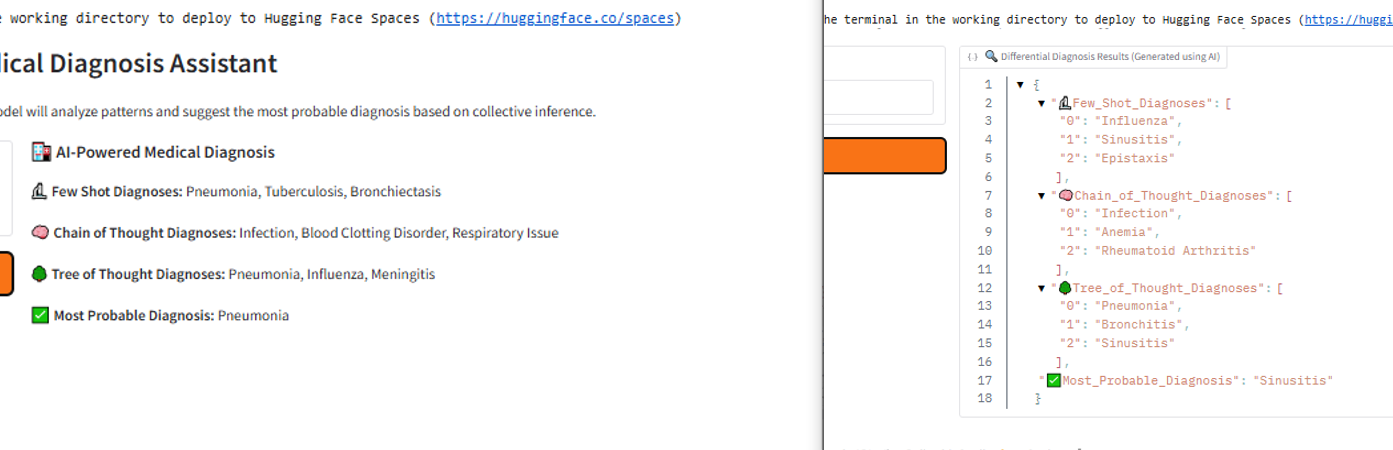

In [ ]:
import openai

openai.api_key = "YOUR_API_KEY"

# Step 0: Input patient symptoms
symptoms = """
- High fever
- Neck stiffness
- Confusion
- Sensitivity to light
- Nausea
"""

# Step 1: Define the Problem Prompt
problem_prompt = f"""
You are tasked with identifying the top 3 most probable medical diagnoses based on the following patient symptoms:

{symptoms}

Simulate a diagnostic reasoning process using Tree of Thought prompting. You will begin by simulating 3 experts.
"""

# Step 2: Prompt each expert independently (Branching + CoT Reasoning)
def expert_reasoning_prompt(expert_name, specialty):
    return f"""
You are {expert_name}, a medical expert specializing in {specialty}. Analyze the symptoms step-by-step and provide your most likely diagnosis. Follow a chain-of-thought style reasoning.

1. Break down the symptoms.
2. Consider differentials and pathophysiology.
3. Rule in/out potential conditions.
4. Propose your most likely diagnosis and justify it.

Symptoms:
{symptoms}
"""

# Step 3: Reflection and Critique
reflection_prompt = """
Now review the reasoning paths and diagnoses provided by Expert A, B, and C.

1. Identify strengths and weaknesses in each expert's diagnosis.
2. Cross-examine conflicting reasoning.
3. Assign a confidence score (0–100) to each diagnosis.
4. Suggest if any diagnosis should be revised or excluded.
"""

# Step 4: Final Consensus
consensus_prompt = """
Based on the critiques, confidence scores, and medical reasoning paths, synthesize a final answer.

Output the top 3 most likely diagnoses, ranked by confidence, and justify each choice briefly.
"""

# Function to query the model
def call_gpt(prompt, model="gpt-4-0613", temperature=0.7):
    response = openai.ChatCompletion.create(
        model=model,
        messages=[{"role": "user", "content": prompt}],
        temperature=temperature
    )
    return response['choices'][0]['message']['content'].strip()

# Run each step
print("Step 1: Define the Problem")
print(problem_prompt)

# Step 2: Get Expert Opinions
expert_A = call_gpt(expert_reasoning_prompt("Expert A", "General Medicine"))
expert_B = call_gpt(expert_reasoning_prompt("Expert B", "Neurology"))
expert_C = call_gpt(expert_reasoning_prompt("Expert C", "Infectious Diseases"))

print("\n--- Expert A ---\n", expert_A)
print("\n--- Expert B ---\n", expert_B)
print("\n--- Expert C ---\n", expert_C)

# Step 3: Cross-Validation / Reflection
combined_experts = f"""
--- Expert A ---
{expert_A}

--- Expert B ---
{expert_B}

--- Expert C ---
{expert_C}
"""

reflection = call_gpt(combined_experts + reflection_prompt)
print("\n--- Reflection and Critique ---\n", reflection)

# Step 4: Final Consensus
final_consensus = call_gpt(combined_experts + "\n\n" + reflection + "\n\n" + consensus_prompt)
print("\n--- Final Consensus ---\n", final_consensus)
